In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk
from scipy.stats import pearsonr
import plotly.express as px
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Spotify Project

<div>
<img src="images/spotifyImage.jpg" width="700"/>
</div>
<br>
<br>

[Github](https://github.com/natihuri1/spotifyProject)<br><br>
[מקור הקובץ](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db)



# A explanation of the columns
> 
**Tempo** - Per Minute (BPM) - of the song. <br>
**Energy** - The energy of a song - the higher the value, the more energtic. song <br>
**Danceability** - The higher the value, the easier it is to dance to this song. <br>
**Loudness** (dB) - The higher the value, the louder the song. <br>
**Liveness** - The higher the value, the more likely the song is a live recording. <br>
**Valence** - The higher the value, the more positive mood for the song. <br>
**Acousticness** - The higher the value the more acoustic the song is. <br>
**Speechiness** - The higher the value the more spoken word the song contains. <br>
**Popularity** - The higher the value the more popular the song is. <br>
**Duration_ms** - The length of the song by ms. <br>


In [2]:
spotify_df = pd.read_csv("SpotifyFeatures.csv")
spotify_df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


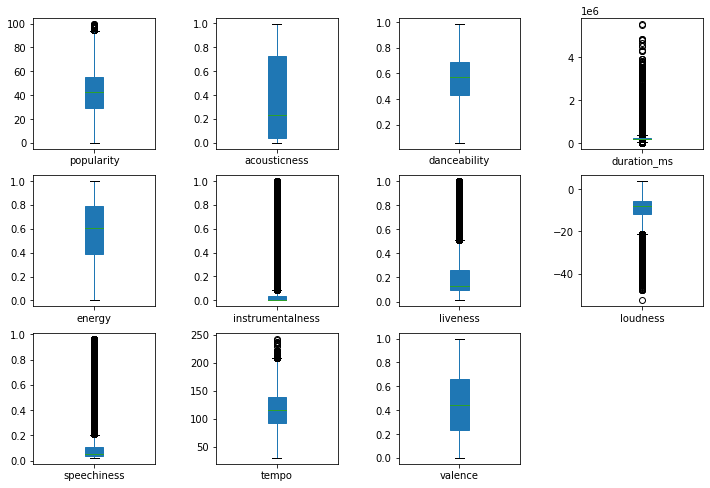

In [3]:
df_to_plot = spotify_df
df_to_plot.plot(subplots=True, layout=(5,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5)

זיהוי חריגים

In [4]:
pd.value_counts(spotify_df.genre)

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

In [5]:
spotify_df = spotify_df[(spotify_df.genre != 'Movie' )& (spotify_df.genre != 'A Capella') &(spotify_df.genre != 'Anime')]
del spotify_df['instrumentalness']

מחיקת ג׳נרים לא רלוונטים

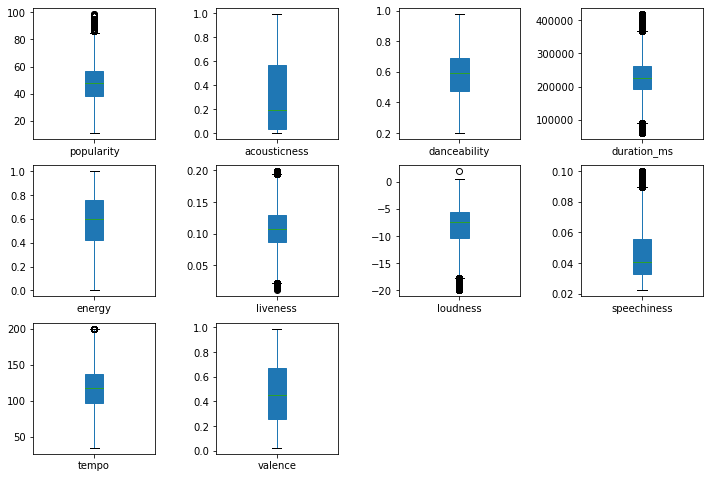

In [6]:
spotify_df = spotify_df[(spotify_df.popularity > 10)&(spotify_df.duration_ms<420000)&
                        (spotify_df.duration_ms>60000)&(spotify_df.speechiness < 0.1)
                        &(spotify_df.tempo<200)&(spotify_df.loudness>-20)&(spotify_df.liveness<0.2)&(spotify_df.danceability>0.2)]
df_to_plot =spotify_df
df_to_plot.plot(subplots=True, layout=(5,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5)

In [7]:
spotify_df.shape

(91894, 17)

In [8]:
spotify_df.to_csv("spotifyData.csv", encoding='utf-8')

In [9]:
url = 'https://raw.githubusercontent.com/natihuri1/spotifyProject/main/spotifyData.csv'
spotify_df = pd.read_csv(url)
spotify_df.shape

(91894, 20)

In [10]:
spotify_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'genre', 'artist_name', 'track_name',
       'track_id', 'popularity', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

הורדת עמודות לא רלוונטיות

In [11]:
del spotify_df['Unnamed: 0']
del spotify_df['Unnamed: 0.1']
del spotify_df['instrumentalness']
spotify_df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,R&B,Rihanna,Desperado,6KFaHC9G178beAp7P0Vi5S,63,0.32300,0.685,186467,0.610,C,0.1020,-5.221,Minor,0.0439,94.384,3/4,0.3230
1,R&B,Yung Bleu,Ice On My Baby (feat. Kevin Gates) - Remix,6muW8cSjJ3rusKJ0vH5olw,62,0.06750,0.762,199520,0.520,F,0.1140,-5.237,Minor,0.0959,75.047,4/4,0.0862
2,R&B,Olivia O'Brien,Love Myself,4XzgjxGKqULifVf7mnDIQK,68,0.59600,0.653,213947,0.621,B,0.0811,-5.721,Minor,0.0409,100.006,4/4,0.4660
3,R&B,ELHAE,Needs,7KdRu0h7PQ0Ecfa37rUBzW,61,0.66100,0.510,205640,0.331,B,0.1230,-13.073,Minor,0.0895,124.657,4/4,0.2250
4,R&B,Nao,Make It Out Alive (feat. SiR),21Ft8ME799DMZjxNwmui6Z,64,0.66700,0.670,239147,0.649,C,0.1090,-7.426,Minor,0.0875,147.935,4/4,0.6180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91889,Soul,H-Town,They Like It Slow,2XoAEpBuM4AtQIQYUEowRy,39,0.11300,0.611,279510,0.493,C#,0.1050,-9.297,Major,0.0354,115.920,4/4,0.4430
91890,Soul,Emily King,Down,5cA0vB8c9FMOVDWyJHgf26,42,0.55000,0.394,281853,0.346,E,0.1290,-13.617,Major,0.0635,90.831,4/4,0.4360
91891,Soul,Muddy Waters,I Just Want To Make Love To You - Electric Mud...,2HFczeynfKGiM9KF2z2K7K,43,0.01360,0.294,258267,0.739,C,0.1380,-7.167,Major,0.0434,176.402,4/4,0.9450
91892,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.9620


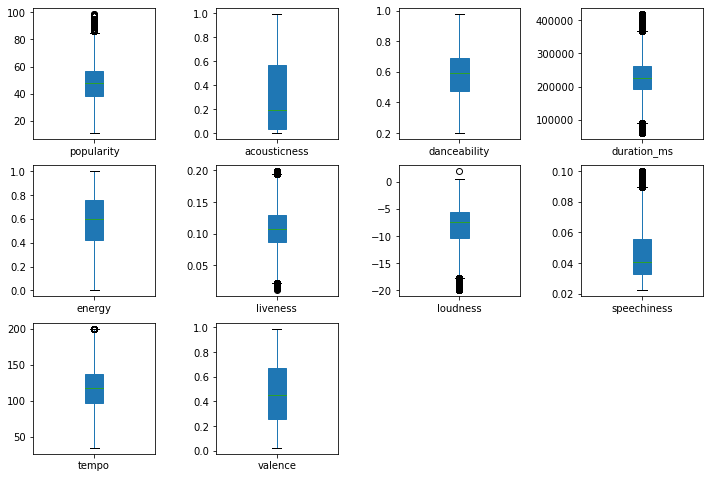

In [12]:
df_to_plot = spotify_df
df_to_plot.plot(subplots=True, layout=(5,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5)

In [13]:
spotify_df.isna().sum()

genre             0
artist_name       0
track_name        0
track_id          0
popularity        0
acousticness      0
danceability      0
duration_ms       0
energy            0
key               0
liveness          0
loudness          0
mode              0
speechiness       0
tempo             0
time_signature    0
valence           0
dtype: int64

### לא קיימים ערכים חסרים בדאטה שלנו

In [14]:
corr_df = spotify_df.corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.137609,0.134497,-0.009743,0.095754,0.001192,0.225401,0.003182,0.006141,-0.044651
acousticness,-0.137609,1.000000,-0.218382,-0.067484,-0.729689,0.039129,-0.627863,-0.173890,-0.131487,-0.240463
danceability,0.134497,-0.218382,1.000000,-0.091748,0.175613,-0.085300,0.224681,0.201535,-0.108909,0.466458
duration_ms,-0.009743,-0.067484,-0.091748,1.000000,-0.001089,-0.045571,-0.030687,-0.105875,0.016439,-0.151448
energy,0.095754,-0.729689,0.175613,-0.001089,1.000000,-0.018702,0.781311,0.242422,0.165024,0.404976
liveness,0.001192,0.039129,-0.085300,-0.045571,-0.018702,1.000000,0.006314,-0.038784,0.001669,-0.091735
loudness,0.225401,-0.627863,0.224681,-0.030687,0.781311,0.006314,1.000000,0.157709,0.121131,0.258259
speechiness,0.003182,-0.173890,0.201535,-0.105875,0.242422,-0.038784,0.157709,1.000000,0.094897,0.141897
tempo,0.006141,-0.131487,-0.108909,0.016439,0.165024,0.001669,0.121131,0.094897,1.000000,0.057511
valence,-0.044651,-0.240463,0.466458,-0.151448,0.404976,-0.091735,0.258259,0.141897,0.057511,1.000000


In [15]:
print(spotify_df.popularity.max())

99


In [16]:
features = ['acousticness','danceability','energy','speechiness','tempo','liveness','valence','loudness']

In [17]:
top100 = spotify_df.nlargest(100,'popularity')
under100 = spotify_df.nsmallest(100,'popularity') 

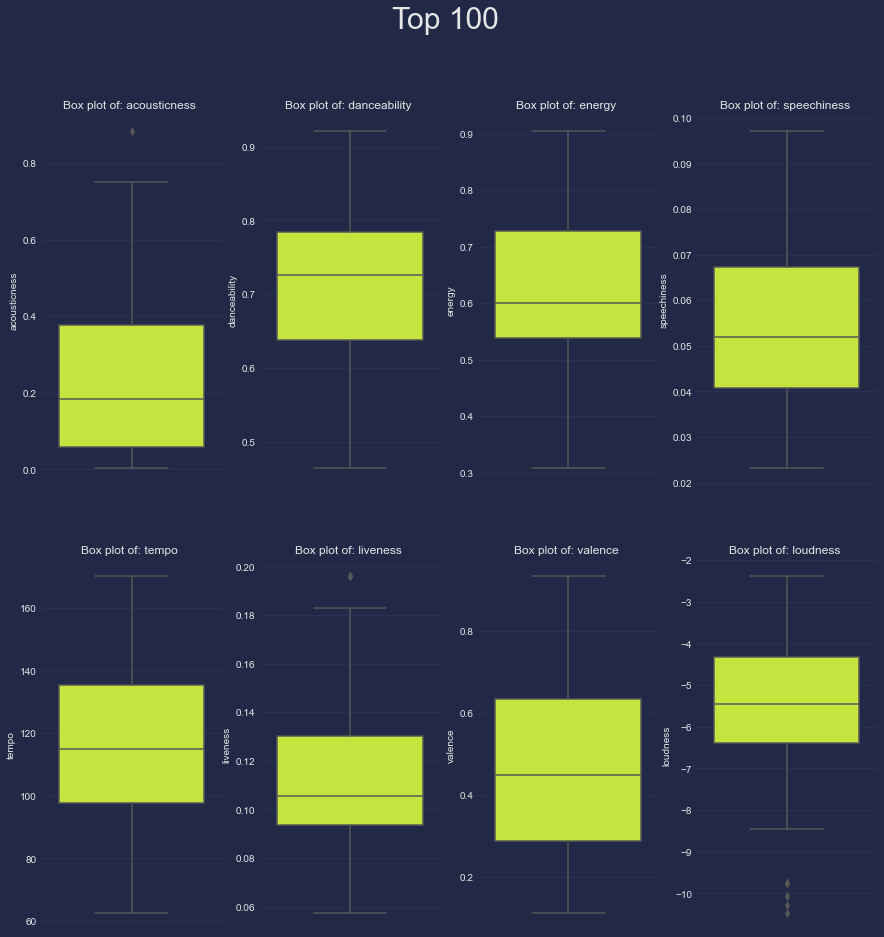

In [18]:
plt.style.use('cyberpunk')
pltnum =1
plt.figure(figsize=(15,15))

for col in features:
    if pltnum <= len(features): 
        plt.suptitle('Top 100',size = 30)
        ax = plt.subplot(2,4,pltnum)
        plt.title("""Box plot of: {0} """.format(col))
        sns.boxplot(y=col , data=top100, palette="gist_ncar_r", ax = ax)
    pltnum+=1
plt.show()


> ניתן לראות כי בשירים המוצלחים הם אפשריים לריקוד עם אנרגיה גבוהה ופחות בסגנון אקוסטי

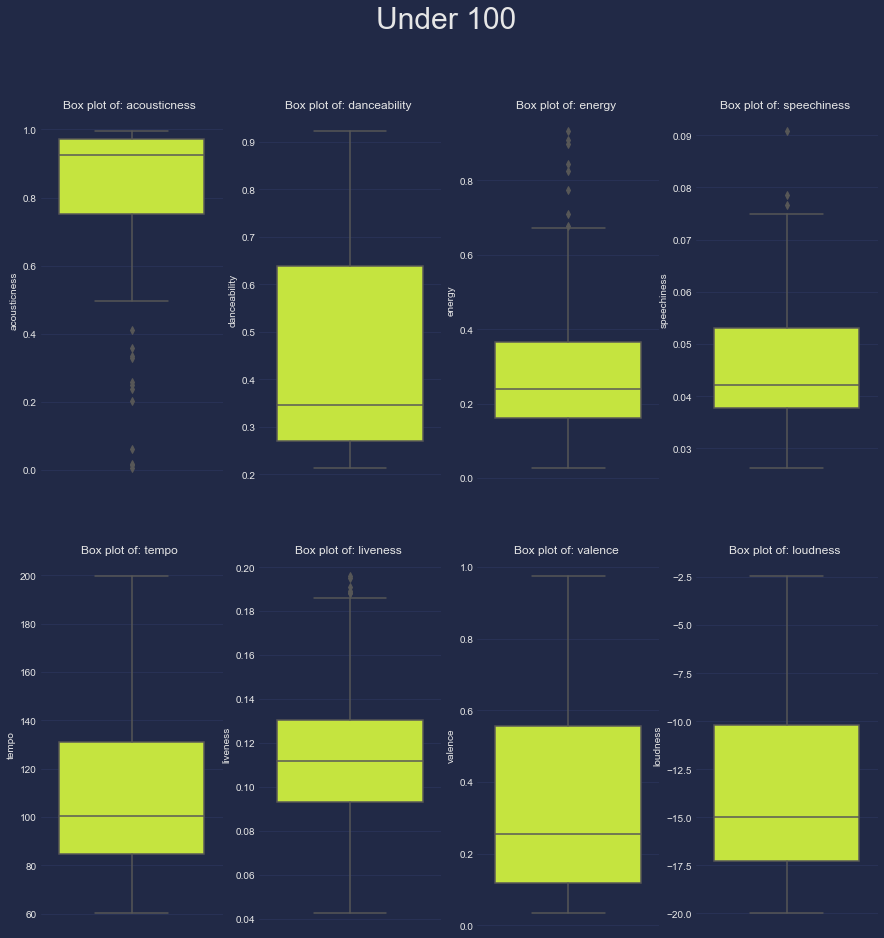

In [19]:
pltnum =1
plt.figure(figsize=(15,15))
#fig.suptitle('Top 100')
for col in features:
    if pltnum <= len(features): 
        plt.suptitle('Under 100',size = 30)
        ax = plt.subplot(2,4,pltnum)
        plt.title("""Box plot of: {0} """.format(col))
        sns.boxplot(y=col , data=under100, palette="gist_ncar_r", ax = ax)
    pltnum+=1
plt.show()

> לעומת השירים הלא מוצלחים שאצלם האקוסטיות שולטת לעומת האפשרי לריקוד ואנרגטי

In [20]:
features = ['acousticness', 'danceability','energy','loudness']

# We'll see if danceability and loudness affects the song's popularity
<div>
<img src="images/dancingPeople.jpg" width="700"/>
</div>
> 

In [21]:
df_1=spotify_df.groupby('popularity')[features].mean().sort_values(by = 'popularity', ascending=False).reset_index()
df_1.sort_values(['popularity'],ascending = False)

,popularity,acousticness,danceability,energy,loudness
0,99,0.042100,0.726000,0.554000,-5.290000
1,98,0.110000,0.737000,0.860000,-2.652000
2,97,0.295022,0.747444,0.599444,-5.412556
3,95,0.192020,0.684600,0.728200,-4.618200
4,94,0.025200,0.820000,0.835000,-4.549667
...,...,...,...,...,...
83,15,0.490989,0.517714,0.516128,-10.512281
84,14,0.535857,0.511793,0.494719,-10.767736
85,13,0.579644,0.488814,0.445267,-11.426948
86,12,0.691746,0.461552,0.378372,-12.365297


In [22]:
corr_df = df_1.corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,popularity,acousticness,danceability,energy,loudness
popularity,1.000000,-0.653698,0.911002,0.610076,0.925083
acousticness,-0.653698,1.000000,-0.739087,-0.819754,-0.789573
danceability,0.911002,-0.739087,1.000000,0.724381,0.936447
energy,0.610076,-0.819754,0.724381,1.000000,0.817714
loudness,0.925083,-0.789573,0.936447,0.817714,1.000000


> נייצר דאטה פריים אשר מחזיק בממוצע של אקוסטיות, אנרגטיות, רועש ואפשרי לריקוד של כול פופלריות 

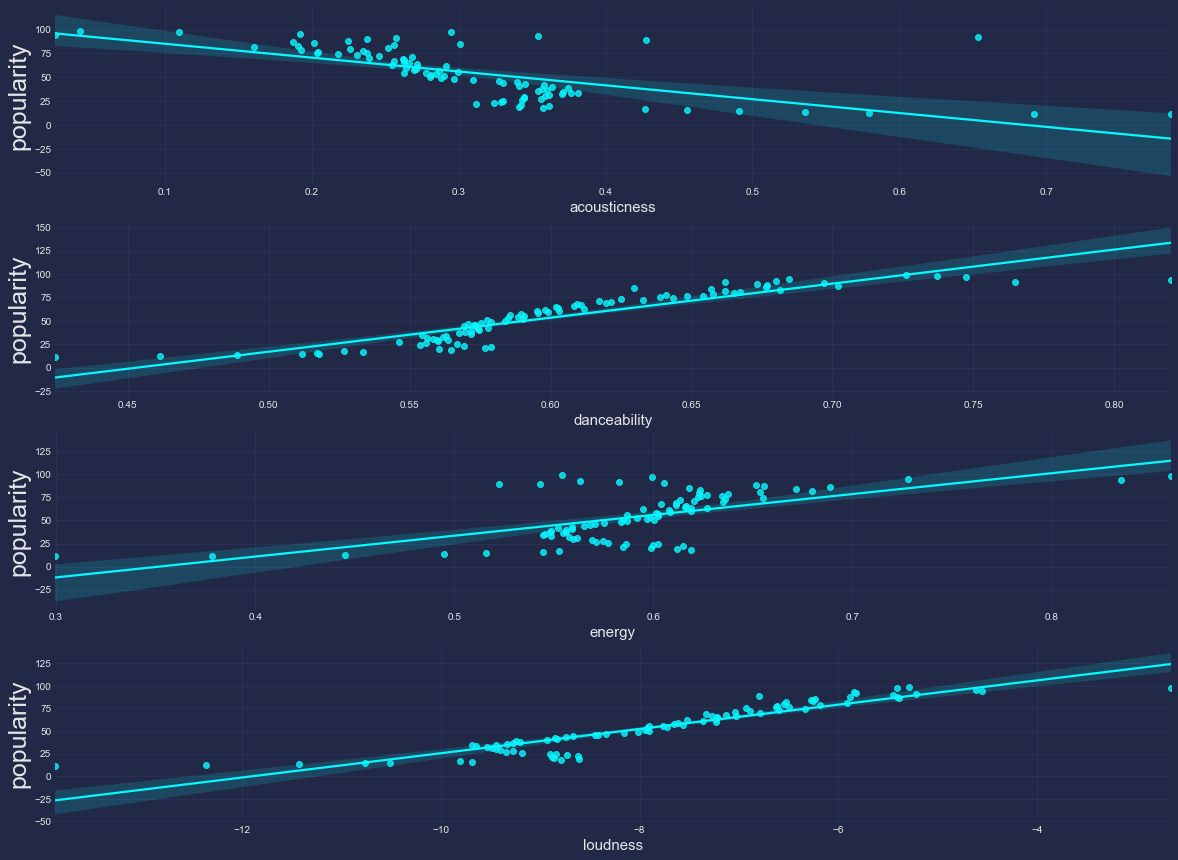

In [23]:
pltnum =1
plt.figure(figsize=(20,15))
for col in features:
    if pltnum <= len(features):
        ax = plt.subplot(4,1,pltnum)
        plt.xlabel(col,fontsize=15)
        plt.ylabel('Popularity', fontsize=25)
        sns.regplot(x=col, y='popularity', data= df_1)
    pltnum+=1
plt.show()

In [24]:
data1 = df_1['popularity']
data2 = df_1['acousticness']
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation Acousticness Popularity: %.3f' % corr)

Pearsons correlation Acousticness Popularity: -0.654


In [25]:
data1 = df_1['popularity']
data2 = df_1['energy']
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation energy Popularity: %.3f' % corr)

Pearsons correlation energy Popularity: 0.610


In [26]:
data1 = df_1['popularity']
data2 = df_1['loudness']
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation Loudness Popularity: %.3f' % corr)

Pearsons correlation Loudness Popularity: 0.925


In [27]:
data1 = df_1['popularity']
data2 = df_1['danceability']
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation Danceability Popularity: %.3f' % corr)

Pearsons correlation Danceability Popularity: 0.911


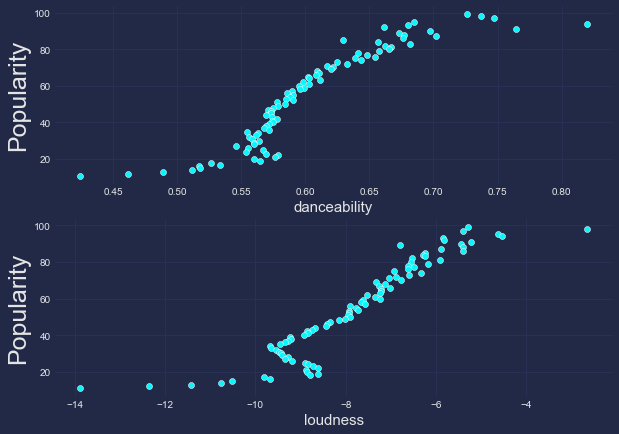

In [28]:
pltnum =1
features =['danceability','loudness']
plt.figure(figsize=(10,15))
for col in features:
    if pltnum <= len(features):
        ax = plt.subplot(4,1,pltnum)
        plt.xlabel(col,fontsize=15)
        plt.ylabel('Popularity', fontsize=25)
        sns.scatterplot(x=col, y='popularity', data= df_1)
    pltnum+=1
plt.show()

> ניתן לראות כי יש קשר בין הגורמים לפופלריות אך הקשר החזק ביותר הינו ברועש ואפשרי לריקוד לכן נבדוק את המתאם בינהם

> לפי הקרולציה הגבוה ניתן לראות שאכן יש קשר בין הצלחת השיר לאפשרי לריקוד ורועש 

# -------------- 2 -------------

# lets try guess if the song will be popular by what we found

In [51]:
def popularity_groups(spotify_df):
    if spotify_df['popularity'] < 30:
        return 'not popular'
    if spotify_df['popularity'] >= 30 and spotify_df['popularity'] < 70:
        return 'popular'
    if spotify_df['popularity']>=70:
        return 'very popular'
spotify_df['class'] = spotify_df.apply(popularity_groups, axis=1)
spotify_df[['popularity', 'class']].head(25)

,popularity,class
0,63,popular
1,62,popular
2,68,popular
3,61,popular
4,64,popular
5,66,popular
6,69,popular
7,71,very popular
8,76,very popular
9,66,popular


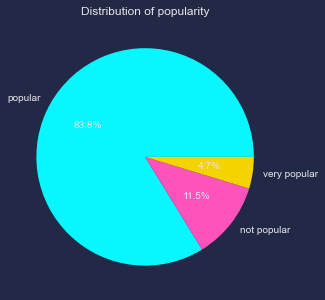

In [52]:
plt.figure(1,figsize=(5,5))
plt.title("Distribution of popularity")
spotify_df['class'].value_counts().plot.pie(autopct="%1.1f%%")
plt.ylabel("")
plt.show()

In [53]:
features = ['acousticness', 'danceability','energy','loudness']
X = spotify_df[features]
y = spotify_df['class']

In [54]:
my_model = sk.tree.DecisionTreeClassifier(criterion="gini")

In [55]:
my_model.fit(X, y)

DecisionTreeClassifier()

In [56]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1)

In [57]:
model2 = sk.tree.DecisionTreeClassifier(criterion="gini")
model2.fit(X_train,y_train)

DecisionTreeClassifier()

In [58]:
prediction2 = model2.predict(X_test)
prediction2

array(['popular', 'not popular', 'popular', ..., 'popular', 'not popular',
       'popular'], dtype=object)

In [59]:
df = pd.DataFrame(columns = ['class', 'predictions'])


In [60]:
df['class'] = y_test
df = df.reset_index(drop=True)

In [61]:
df['predictions'] = pd.Series(prediction2)
df

,class,predictions
0,not popular,popular
1,popular,not popular
2,popular,popular
3,popular,popular
4,not popular,popular
...,...,...
27564,popular,popular
27565,popular,popular
27566,popular,popular
27567,not popular,not popular


In [62]:
sk.metrics.accuracy_score(prediction2, y_test)


0.802024012477783

In [63]:
dt = sk.tree.DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
acc = sk.metrics.accuracy_score(pred, y_test)

In [64]:
dt.feature_importances_

array([0.27250128, 0.22855441, 0.22858297, 0.27036134])

In [65]:
xxx = ['energy','danceability','acousticness','loudness']
X_s = spotify_df[xxx]
y_s = spotify_df['class']
X_train_s, X_test_s, y_train_s, y_test_s = sk.model_selection.train_test_split(X_s, y_s, test_size=0.3, random_state=1) 
model_s = sk.tree.DecisionTreeClassifier(criterion="gini")
model_s.fit(X_train_s, y_train_s)
prediction_s = model_s.predict(X_test_s)
print('The accuracy of the Decision Tree is',sk.metrics.accuracy_score(prediction_s,y_test_s))

The accuracy of the Decision Tree is 0.803184736479379


In [66]:
from sklearn.svm import SVC
svm_model = SVC(random_state = 0)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
sk.metrics.accuracy_score(svm_pred, y_test)

0.8407994486560992

In [67]:
artistData = spotify_df.groupby(['artist_name']).mean().sort_values(by='popularity', ascending = False).reset_index()
artistData.head()

,artist_name,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence
0,Pedro Capó,87.0,0.2610,0.7815,209133.0,0.7035,0.11165,-4.7745,0.04995,126.9125,0.6555
1,Paloma Mami,84.0,0.5870,0.8060,183398.0,0.7350,0.08120,-4.4590,0.04250,100.1010,0.3530
2,a-ha,84.0,0.0180,0.5730,225280.0,0.9020,0.09280,-7.6380,0.05400,84.4120,0.8760
3,Eurythmics,82.0,0.2270,0.6920,216933.0,0.7110,0.12000,-7.4980,0.03170,125.1350,0.8750
4,Martin Garrix,81.6,0.1731,0.5130,215300.6,0.6360,0.10236,-6.6878,0.04000,125.9858,0.2906


In [68]:
pd.value_counts(spotify_df.artist_name).nlargest(60)

The Black Keys            199
Chris Brown               185
Shane & Shane             182
Giuseppe Verdi            181
Giacomo Puccini           165
The Avett Brothers        164
Hans Zimmer               150
Radiohead                 145
Thievery Corporation      144
Florence + The Machine    139
Casting Crowns            139
Hillsong UNITED           133
Hillsong Worship          127
for KING & COUNTRY        125
Red Hot Chili Peppers     124
Chris Tomlin              124
Taylor Swift              123
311                       121
Shinedown                 119
Gorillaz                  118
Billie Holiday            115
The Weeknd                114
Phil Wickham              112
The Strokes               112
Nina Simone               111
Rebelution                110
Sade                      110
Weezer                    109
Trey Songz                107
Carrie Underwood          106
NOFX                      106
Rihanna                   106
Moby                      106
Norah Jone

# ---------- 3 ---------
# Lets explore the band

<div>
<img src="images/RHCPimage.jpg" width="700"/>
</div>

In [69]:
artist = spotify_df.loc[spotify_df.artist_name == 'Red Hot Chili Peppers'].sort_values(by= 'popularity', ascending =False)
artist.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,class
31555,Children’s Music,Red Hot Chili Peppers,Under The Bridge,3d9DChrdc6BOeFsbrZ3Is0,82,0.0576,0.559,264307,0.345,E,0.141,-13.496,Major,0.0459,84.581,4/4,0.458,very popular
31576,Children’s Music,Red Hot Chili Peppers,Californication,48UPSzbZjgc449aqz8bxox,82,0.0021,0.592,329733,0.767,A,0.127,-2.788,Minor,0.0270,96.483,4/4,0.328,very popular
66527,Rock,Red Hot Chili Peppers,Under The Bridge,3d9DChrdc6BOeFsbrZ3Is0,82,0.0576,0.559,264307,0.345,E,0.141,-13.496,Major,0.0459,84.581,4/4,0.458,very popular
66561,Rock,Red Hot Chili Peppers,Can't Stop,3ZOEytgrvLwQaqXreDs2Jx,82,0.0179,0.618,269000,0.938,A,0.167,-3.442,Major,0.0456,91.455,4/4,0.875,very popular
66584,Rock,Red Hot Chili Peppers,Californication,48UPSzbZjgc449aqz8bxox,82,0.0021,0.592,329733,0.767,A,0.127,-2.788,Minor,0.0270,96.483,4/4,0.328,very popular


In [70]:
artist.groupby(artist['key']).mean()


,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence
key,,,,,,,,,,
A,63.666667,0.068703,0.549429,279189.714286,0.804905,0.117686,-3.817857,0.039619,110.055190,0.482619
B,63.625000,0.303000,0.530375,288842.000000,0.835875,0.119250,-4.883875,0.049175,115.985750,0.562625
C,61.791667,0.016501,0.474708,262046.041667,0.790042,0.091417,-4.205833,0.047888,111.407083,0.404042
C#,54.166667,0.045895,0.487833,282519.666667,0.573500,0.116917,-7.302000,0.035600,135.500833,0.419500
D,57.769231,0.069710,0.629769,254948.615385,0.825000,0.119277,-4.047077,0.036169,126.105077,0.564692
E,69.222222,0.122967,0.416667,259689.000000,0.524000,0.133333,-8.539667,0.033833,121.236000,0.450667
F,69.166667,0.052200,0.681500,295766.500000,0.644000,0.108500,-6.005500,0.049250,90.065000,0.426500
F#,56.142857,0.061368,0.564143,231146.428571,0.794143,0.138657,-4.639714,0.047486,95.043571,0.650143
G,57.631579,0.069012,0.533526,251896.789474,0.786316,0.116805,-5.840789,0.046979,112.689632,0.480863


In [71]:
df_3=artist.groupby('key').mean().sort_values(by = 'popularity', ascending=False).reset_index()
df_3

,key,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence
0,E,69.222222,0.122967,0.416667,259689.000000,0.524000,0.133333,-8.539667,0.033833,121.236000,0.450667
1,F,69.166667,0.052200,0.681500,295766.500000,0.644000,0.108500,-6.005500,0.049250,90.065000,0.426500
2,A,63.666667,0.068703,0.549429,279189.714286,0.804905,0.117686,-3.817857,0.039619,110.055190,0.482619
3,B,63.625000,0.303000,0.530375,288842.000000,0.835875,0.119250,-4.883875,0.049175,115.985750,0.562625
4,C,61.791667,0.016501,0.474708,262046.041667,0.790042,0.091417,-4.205833,0.047888,111.407083,0.404042
5,G#,58.454545,0.275445,0.493545,274545.272727,0.578909,0.114982,-7.827545,0.032945,136.770182,0.524455
6,D,57.769231,0.069710,0.629769,254948.615385,0.825000,0.119277,-4.047077,0.036169,126.105077,0.564692
7,G,57.631579,0.069012,0.533526,251896.789474,0.786316,0.116805,-5.840789,0.046979,112.689632,0.480863
8,F#,56.142857,0.061368,0.564143,231146.428571,0.794143,0.138657,-4.639714,0.047486,95.043571,0.650143
9,C#,54.166667,0.045895,0.487833,282519.666667,0.573500,0.116917,-7.302000,0.035600,135.500833,0.419500


> ממוצע פופלריות לפי כול אקורד

<AxesSubplot:xlabel='key'>

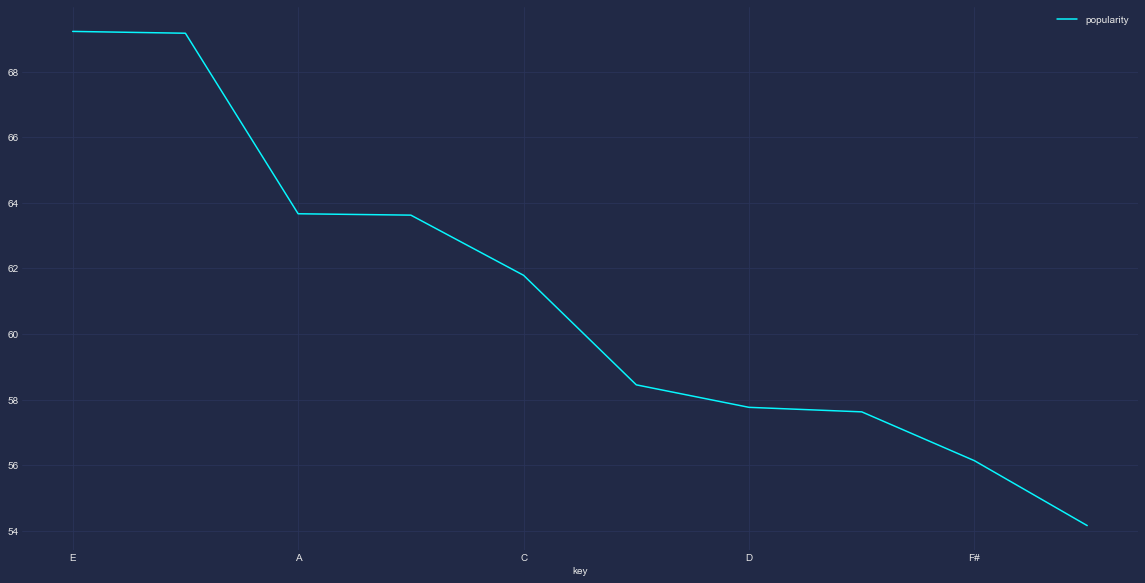

In [72]:
plt.style.use('cyberpunk')

df_3.plot(figsize = (20,10),x = 'key', y = 'popularity')

# FACT! - E is the basic Rock chord 
> ניתן לראות שהשירים עם האקורד אי בעלי ממוצע הצלחה הגבוה ביותר מכיוון שרד הוט ידועים כלהקת רוק לכן כדי הסיכוי ששיר על בסיס אקורד אי בעל סיכוי גבוה יותר להצליח! 